### The Sparks Foundation: Data Science and Business Analyst Intern
### Author : Aakash Khair 
### Task 6: Prediction using Decision Tree Algorithm

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

#for checking the model accuracy
from sklearn import metrics

## Loading the files

In [2]:
iris_ds = pd.read_csv("F:/Study Material/GRIP Data Analyst Internship/Iris.csv")

In [3]:
iris_ds.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Understanding the dataset

From the dataset we can figure out that given 4 features i.e sepal length, sepal width, petal length, and petal width determine whether a flower is Setosa, Versicolor or Virginica.

Sepal length,Sepal width, Petal length, Petal width are called feature/Variable/Input-variable/Independent-variable
Species are called Labels/Dependent-variable/out-variable/class/class-label/Response label

In [4]:
iris_ds.rename(columns={'SepalLengthCm':'Sepal.Length','SepalWidthCm':'Sepal.Width','PetalLengthCm':'Petal.Length','PetalWidthCm':'Petal.Width','Species':'Species'},inplace=True)
iris_ds.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#check for missing data
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [55]:
#check for missing data
iris_ds.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### There is no missing data in the Iris Dataset 

In [6]:
iris_ds.describe()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# To check if dataset is balanced
iris_ds.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                Sepal.Length         ... Petal.Length      Petal.Width         \
                       count   mean  ...          75%  max       count   mean   
Species                              ...                                        
Iris-setosa             50.0  5.006  ...        1.575  1.9        50.0  0.244   
Iris-versicolor         50.0  5.936  ...        4.600  5.1        50.0  1.326   
Iris-virginica          50.0  6.588  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
Species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

##### The data distribution among setosa, virginica, versicolor are equal so iris dataset is a Balanced dataset (as the number of data points for every class is 50)

In [8]:
#creating correlation matrix in order to visualise the correlaton between different fields
iris_ds.corr()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal.Length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal.Width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal.Length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal.Width,0.899759,0.817954,-0.356544,0.962757,1.000000


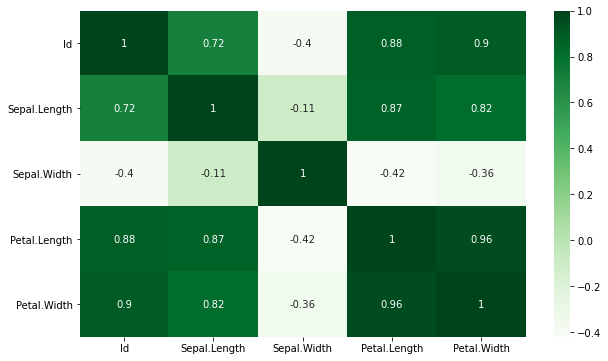

In [9]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(iris_ds.corr(), cmap='Greens', annot = True);

##### From the above heatmap, we see that petal_length and petal_width have a high correlation, sepal length and petal length have good correlations and also the correlation between sepal length and petal width is good

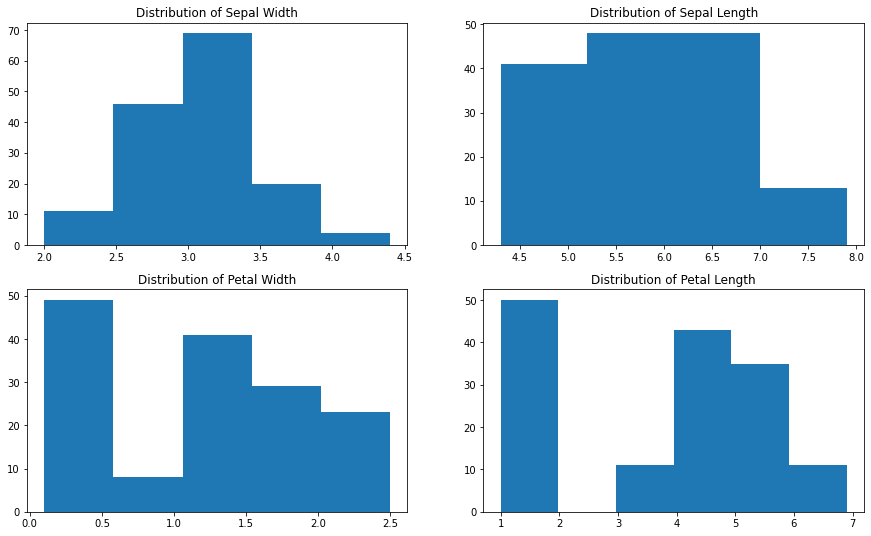

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_ds['Sepal.Width'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_ds['Sepal.Length'], bins=4);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_ds['Petal.Width'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_ds['Petal.Length'], bins=6);

The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
The Highest frequency of sepal length is between 6.0 and 7.0 which is around 50.
The Highest frequency of petal width is between 0 to 0.5 which is around 50.
The Highest frequency of petal length is between 0 to 0.5 which is around 50.

### Now we plot the scatterplot in order to find the correlations between sepal length vs sepal width and petal length vs petal width

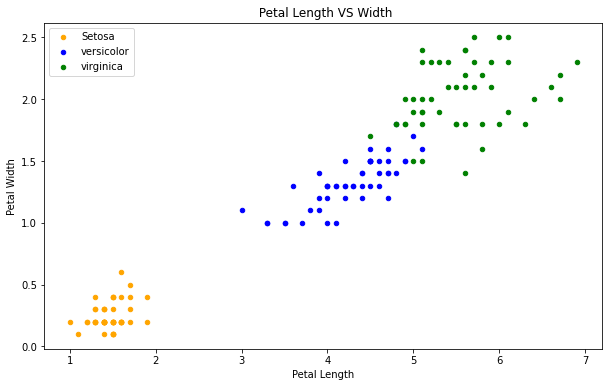

In [13]:
fig = iris_ds[iris_ds.Species=='Iris-setosa'].plot.scatter(x='Petal.Length',y='Petal.Width',color='orange', label='Setosa')
iris_ds[iris_ds.Species=='Iris-versicolor'].plot.scatter(x='Petal.Length',y='Petal.Width',color='blue', label='versicolor',ax=fig)
iris_ds[iris_ds.Species=='Iris-virginica'].plot.scatter(x='Petal.Length',y='Petal.Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


From the above two scatterplots we can conclude that Petals show better distribution and clustering as compared to the Sepals and hence we can further make use of Petals for making predictions. 

We will predict the accuracy once by taking all the features and then next by taking Petal features

### From the given information we can say that it is a classification problem as the target variable takes only small number of discrete variables. So we will use Decision Tree Classifier to predict


In [14]:
#Just trying to explore some new feature using the given data...

iris_ds['Sepal_diff'] = iris_ds['Sepal.Length']-iris_ds['Sepal.Width']
iris_ds['petal_diff'] = iris_ds['Petal.Length']-iris_ds['Petal.Width']

In [15]:

iris_ds['Sepal_petal_len_diff'] = iris_ds['Sepal.Length']-iris_ds['Petal.Length']
iris_ds['Sepal_petal_width_diff'] = iris_ds['Sepal.Width']-iris_ds['Petal.Width']

In [16]:
iris_ds['Sepal_petal_len_wid_diff'] = iris_ds['Sepal.Length']-iris_ds['Petal.Width']
iris_ds['Sepal_petal_wid_len_diff'] = iris_ds['Sepal.Width']-iris_ds['Petal.Length']
iris_ds

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


[Text(152.1818181818182, 199.32, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(121.74545454545455, 163.07999999999998, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(182.61818181818182, 163.07999999999998, 'X[4] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(121.74545454545455, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(91.30909090909091, 90.6, 'X[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(60.872727272727275, 54.359999999999985, 'X[0] <= 5.6\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(30.436363636363637, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(91.30909090909091, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(121.74545454545455, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(152.1818181818182, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(243.4909090909091,

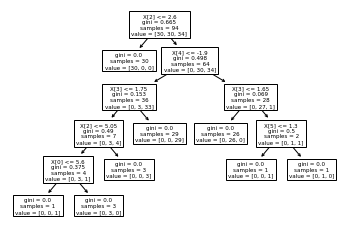

In [17]:
#Here we separating independent varibles or target varibles from Iris dataset


X = iris_ds[['Sepal.Length', 'Sepal.Width','Petal.Length', 'Petal.Width','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = iris_ds['Species']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


#Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

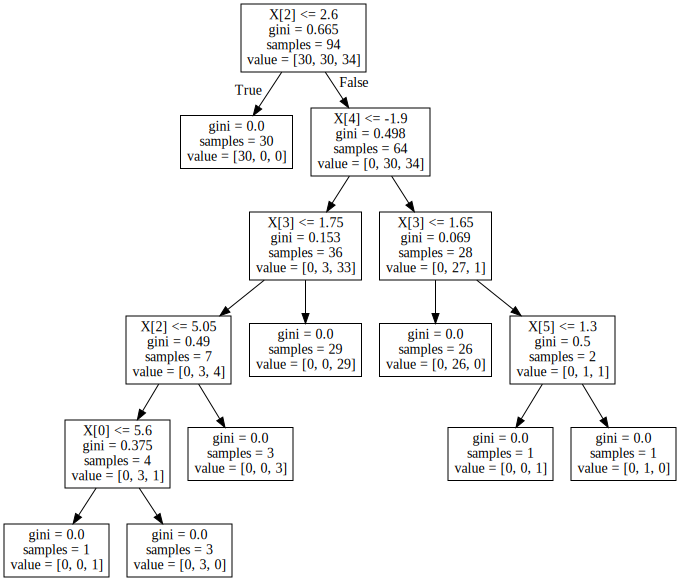

In [18]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph 

In [19]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9254032258064516


In [20]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [21]:

#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

### Now Train on Actual Test Data

[Text(133.92000000000002, 203.85, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(100.44000000000001, 176.67000000000002, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.40000000000003, 176.67000000000002, 'X[4] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(100.44000000000001, 149.49, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(66.96000000000001, 122.31, 'X[4] <= -2.6\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(33.480000000000004, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(100.44000000000001, 95.13, 'X[0] <= 5.45\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(66.96000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 67.94999999999999, 'X[2] <= 5.05\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(100.44000000000001, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(167.40000000000003, 40.77000

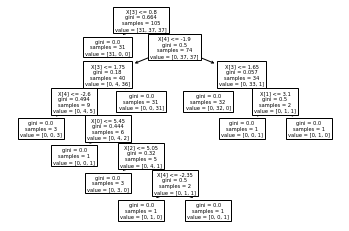

In [22]:
#Training model on Actual train data...
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

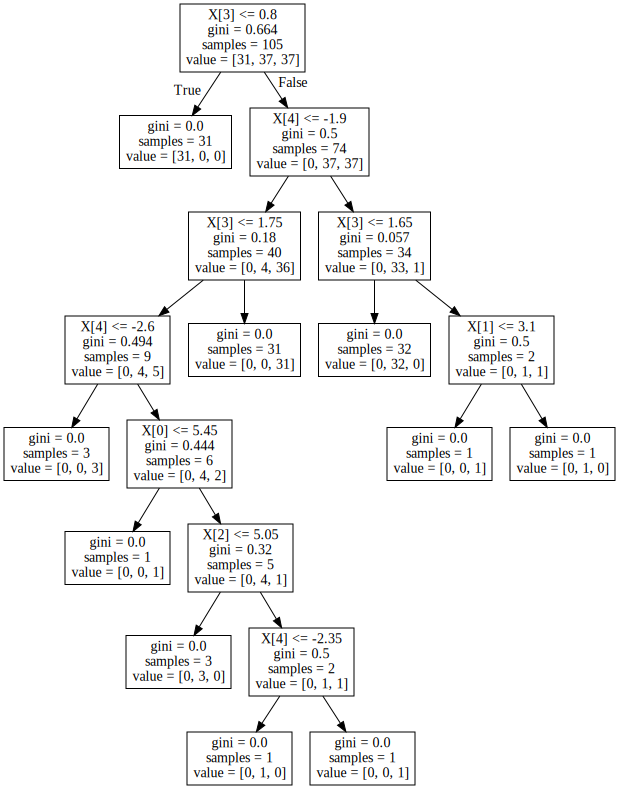

In [23]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [24]:
#Checking the performance of model on Actual Test data...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

### Testing new points which are not in Dataset

In [26]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
